In [9]:
### 🔧 TAREA
#Explora el dataset e intenta responder:
#
#- ¿Qué variables tienen valores faltantes?
#- ¿Qué variables parecen más correlacionadas con el target?
#- ¿Hay valores extremos que deberías tratar?

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Configuración de estilo
sns.set(style="whitegrid")

In [ ]:
# 📥 Cargar el dataset original para revisar su estructura 
df = pd.read_csv("../data/cs-training.csv")

# 👁️ Primer vistazo a los datos
df.head()

# 🧼 Información general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

Si bien el archivo viene bastante completo, la columna de ```MonthlyIncome``` y la columna ```NumberOfDependents``` viene con valores nulos por lo que se tendrá que realizar una imputacion de datos a esas columnas

Distribución del target:
SeriousDlqin2yrs
0    0.93316
1    0.06684
Name: proportion, dtype: float64


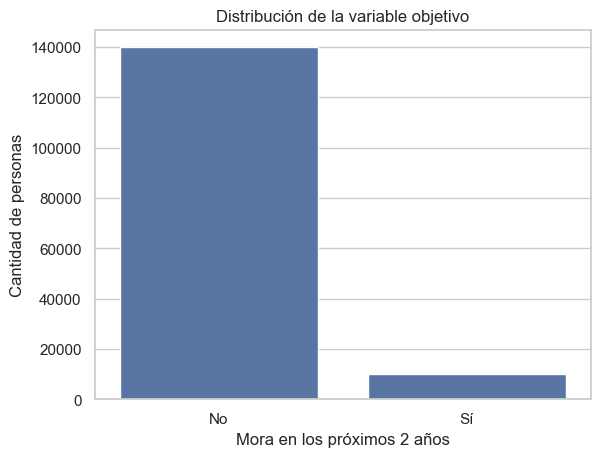

In [ ]:
# 🔍 Distribución de la variable objetivo
target_counts = df["SeriousDlqin2yrs"].value_counts(normalize=True)
print("Distribución del target:")
print(target_counts)

sns.countplot(data=df, x="SeriousDlqin2yrs")
plt.title("Distribución de la variable objetivo")
plt.xlabel("Mora en los próximos 2 años")
plt.ylabel("Cantidad de personas")
plt.xticks([0, 1], ["No", "Sí"])
plt.show()

La distribución del target está muy desbalanceada, por lo que tambien se tendrá que hacer un balanceo de los datos para que sean mas representativos para el entrenamiento y test

In [ ]:
# 📊 Estadísticas descriptivas
df.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


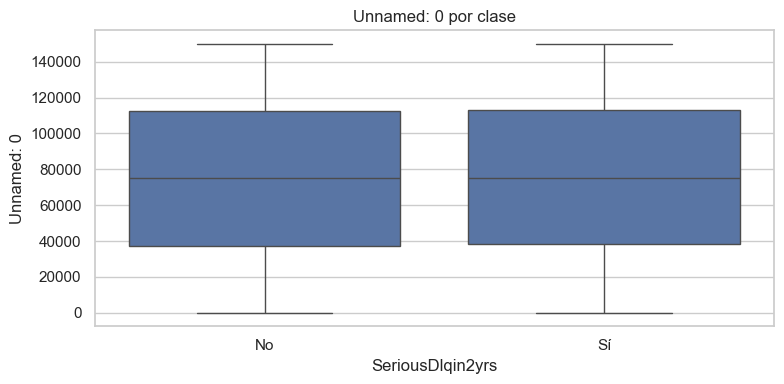

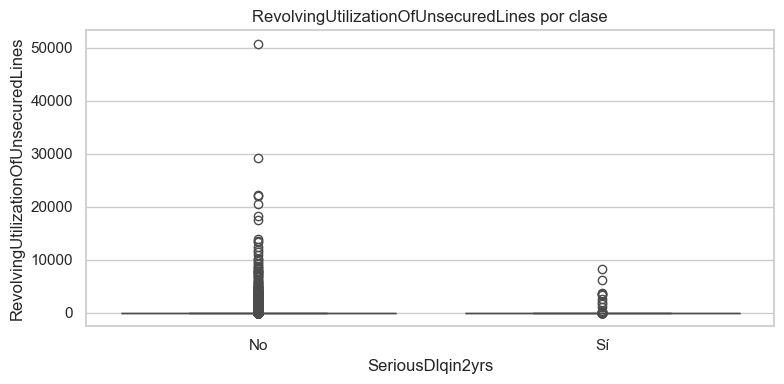

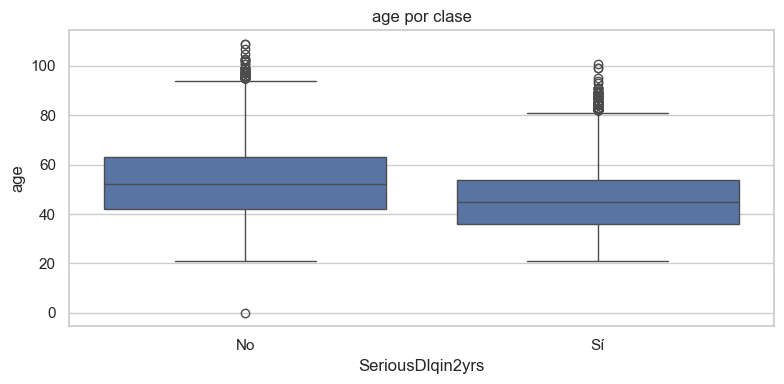

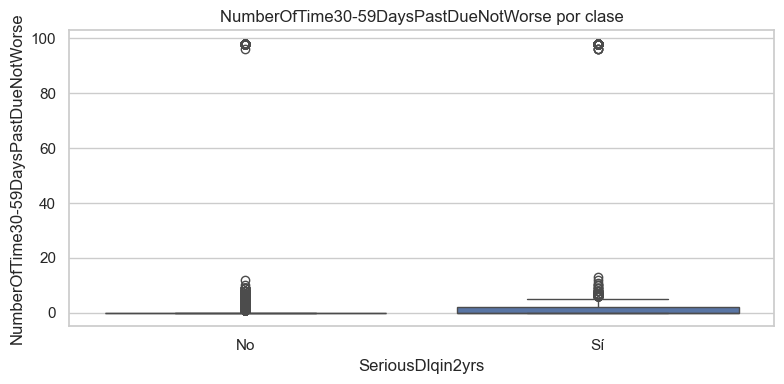

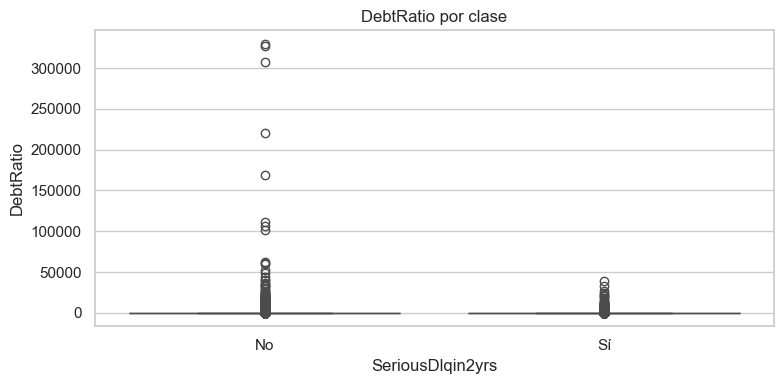

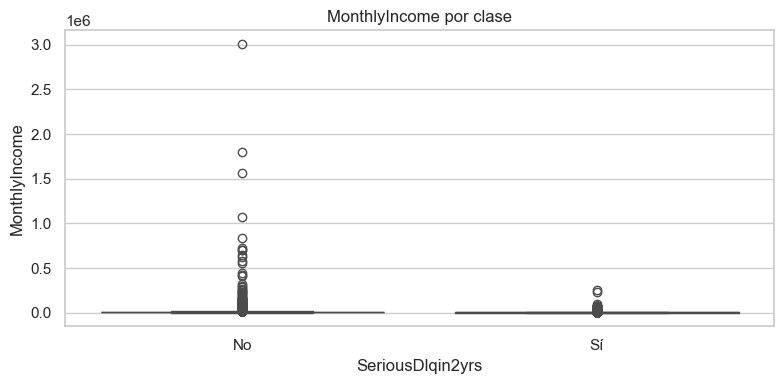

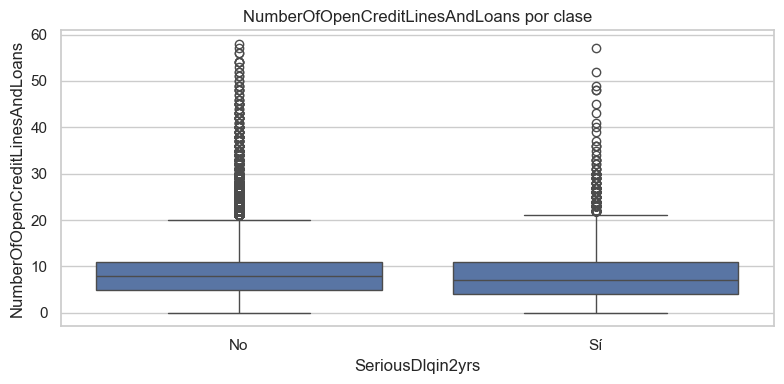

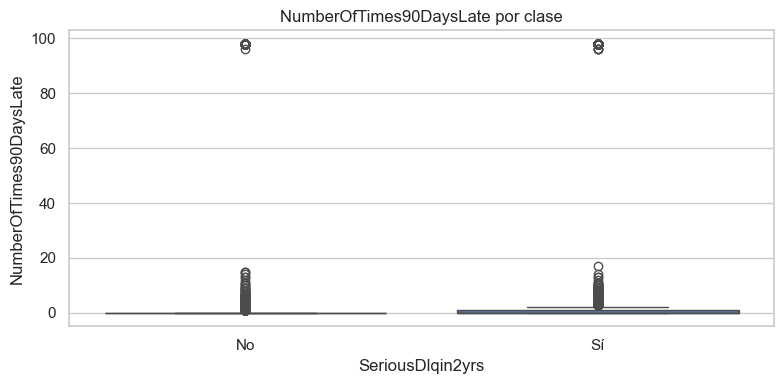

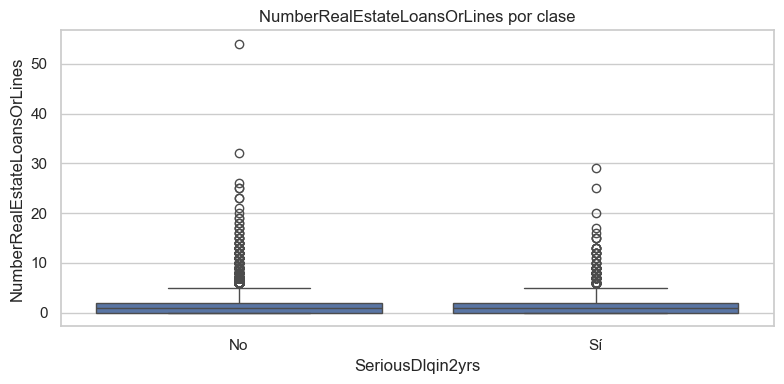

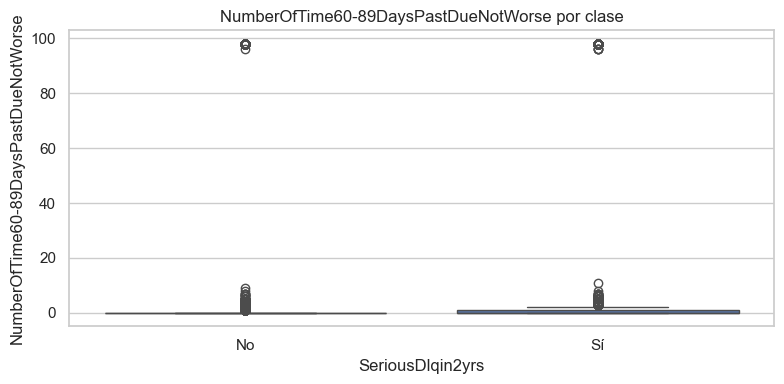

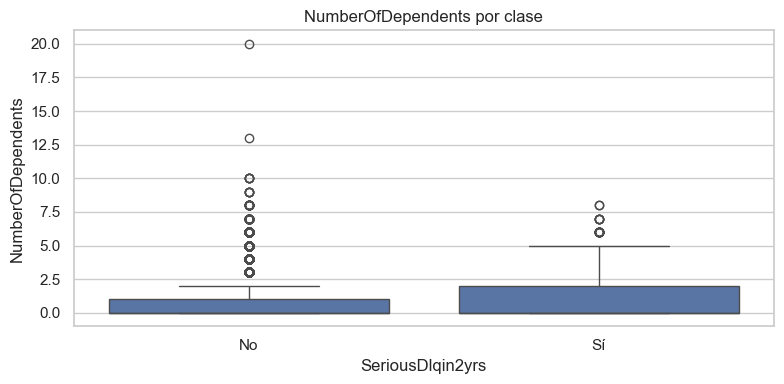

In [ ]:
# 📉 Boxplots por variable numérica
for col in df.columns:
    if col != "SeriousDlqin2yrs":
        plt.figure(figsize=(8, 4))
        sns.boxplot(x="SeriousDlqin2yrs", y=col, data=df)
        plt.title(f"{col} por clase")
        plt.xticks([0, 1], ["No", "Sí"])
        plt.tight_layout()
        plt.show()

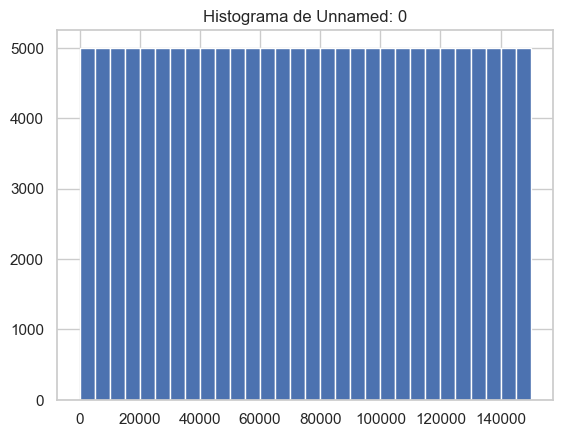

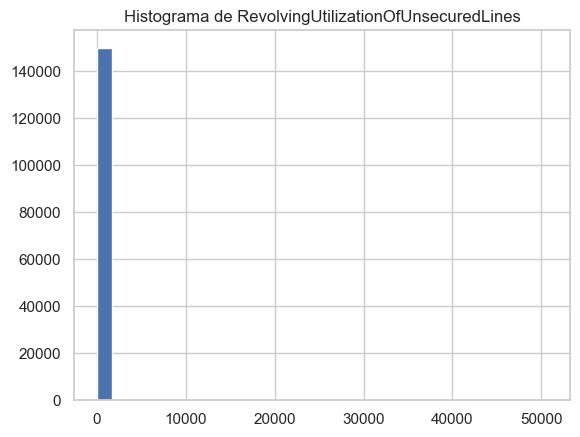

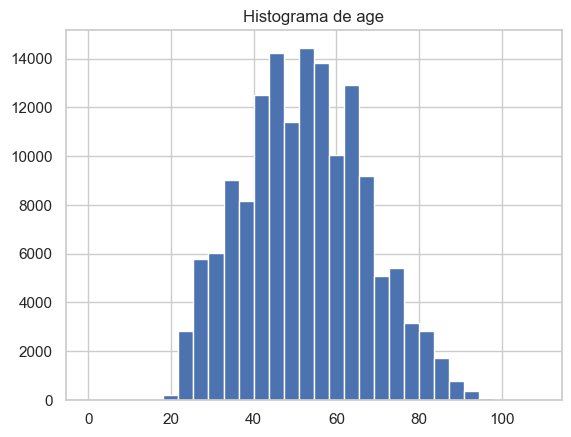

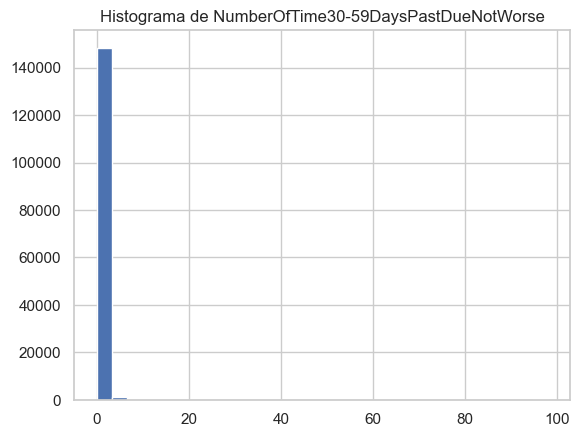

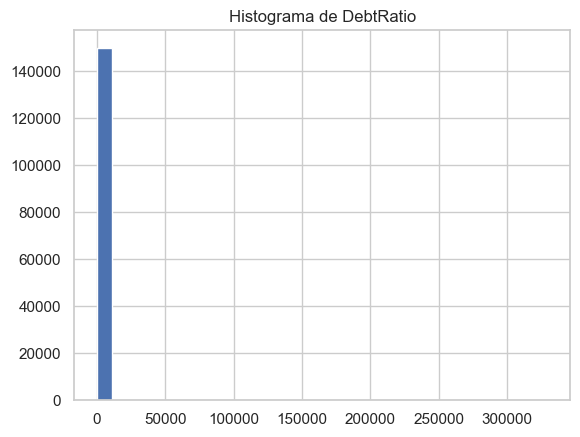

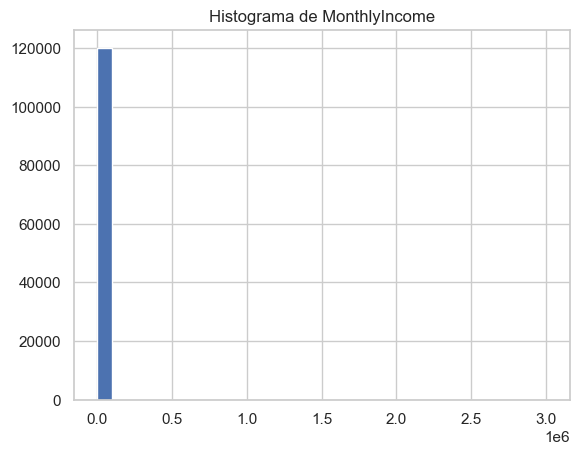

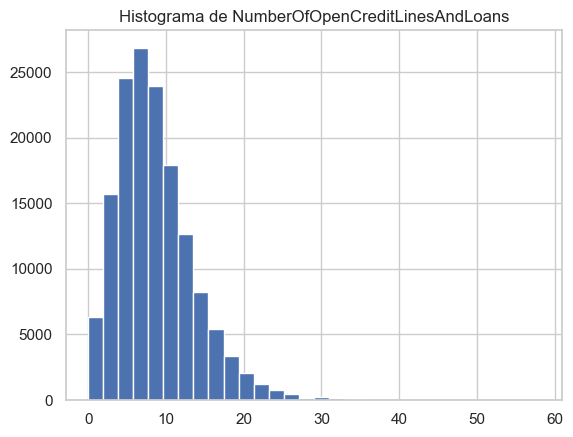

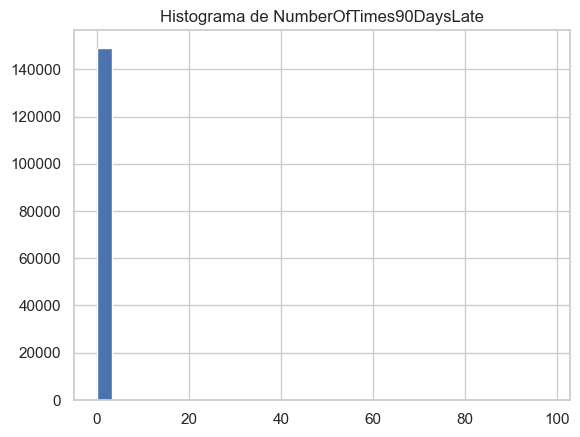

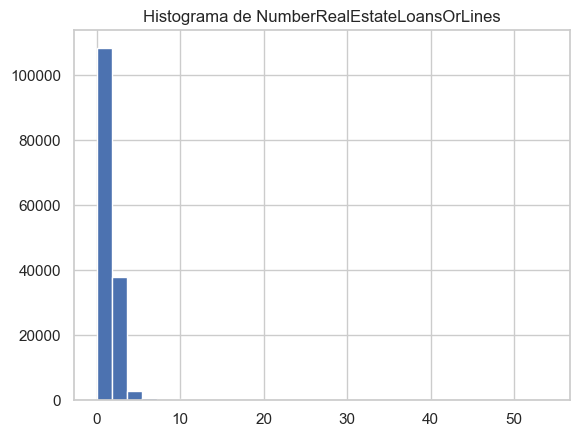

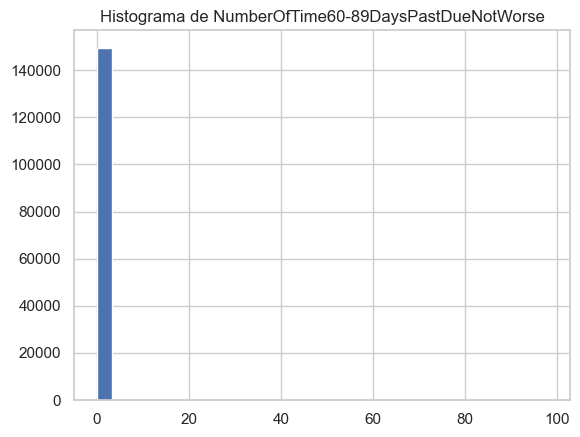

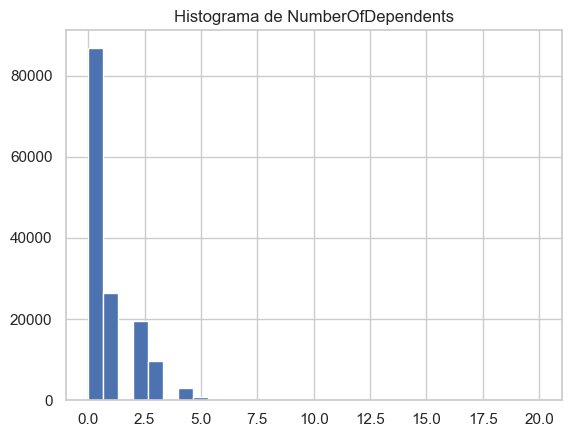

In [16]:
# 🧠 TODO: Agregar histograma por variable (para tarea)
for col in df.columns:
    if col != "SeriousDlqin2yrs":
        plt.hist(df[col], bins=30)
        plt.title(f"Histograma de {col}")
        plt.show()

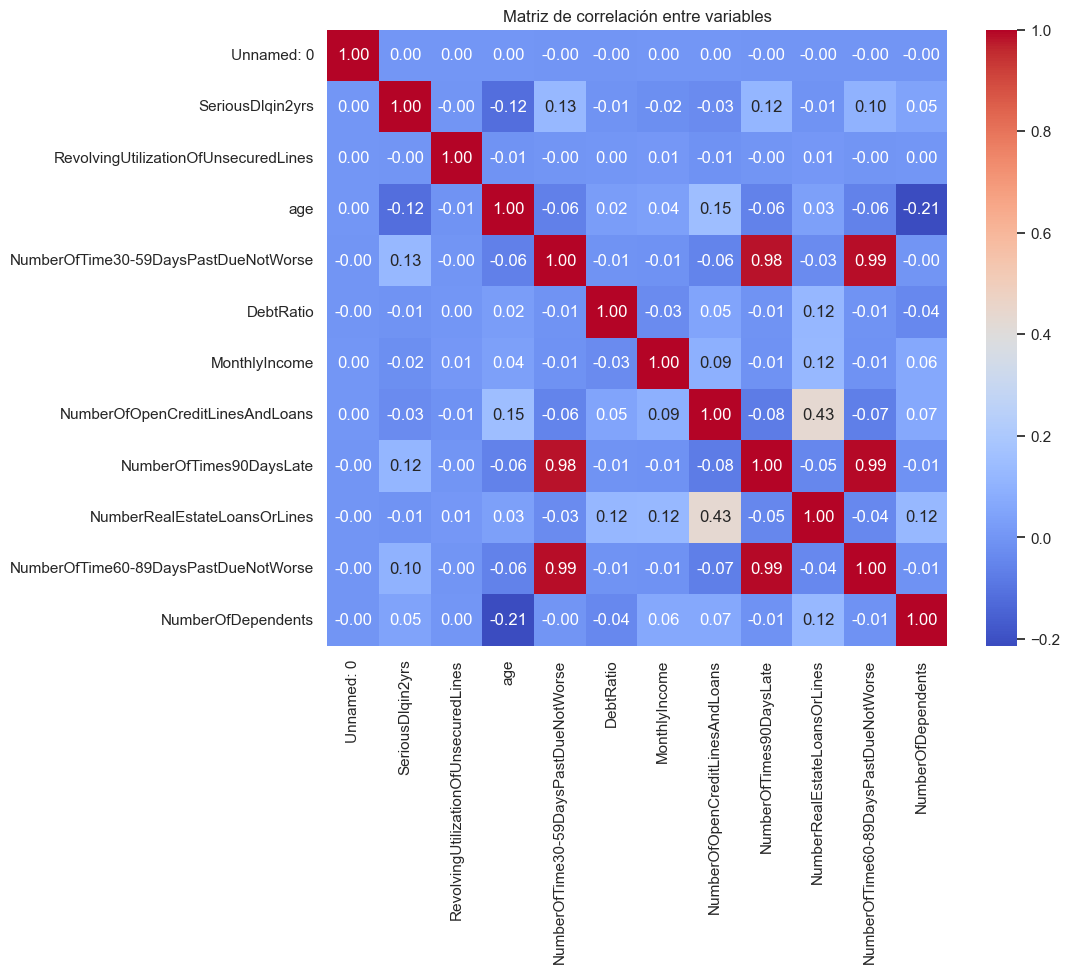

In [17]:
# 🔗 Mapa de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación entre variables")
plt.show()

In [18]:
# 📝 TODO: Identificar outliers o valores extremos (completar)
# - Analizar la columna RevolvingUtilizationOfUnsecuredLines
# - Verificar valores inusuales en MonthlyIncome o DebtRatio

In [19]:
# 🧩 Comentarios
# - ¿Qué variables parecen más correlacionadas con la clase objetivo?
# - ¿Hay variables que podrían necesitar transformación o escalamiento?
# - ¿Existe desbalance significativo?

In [20]:
### 📊 Pregunta de reflexión
#Después del análisis exploratorio:
#
#- ¿Qué variable crees que será más relevante para predecir el default?
#- ¿Alguna variable presenta un comportamiento que te parezca inesperado?